# STAR WARS: The Data Strikes Back

In [1]:
#import dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress
import seaborn as sns

In [2]:
#API Calls
#films
url_films = "http://swapi.dev/api/films/" 
films_response = requests.get(url_films).json()

#people
url_people = "http://swapi.dev/api/people/" 
people_response = requests.get(url_people).json()

#planets
url_planets = "http://swapi.dev/api/planets/"
planets_response = requests.get(url_planets).json()

#species
url_species = "http://swapi.dev/api/species/" 
species_response = requests.get(url_species).json()

#vehicles
url_vehicles = "http://swapi.dev/api/vehicles/" 
vehicles_response = requests.get(url_vehicles).json()

#starships
url_starships = "http://swapi.dev/api/starships/"
starships_response = requests.get(url_starships).json()

# Star Wars Films

In [3]:
#API Call for films
url_films = "http://swapi.dev/api/films/" 
films_response = requests.get(url_films).json()
## Film json dump (captioned out to save space)
print(json.dumps(films_response, indent=2, sort_keys=True))

{
  "count": 6,
  "next": null,
  "previous": null,
  "results": [
    {
      "characters": [
        "http://swapi.dev/api/people/1/",
        "http://swapi.dev/api/people/2/",
        "http://swapi.dev/api/people/3/",
        "http://swapi.dev/api/people/4/",
        "http://swapi.dev/api/people/5/",
        "http://swapi.dev/api/people/6/",
        "http://swapi.dev/api/people/7/",
        "http://swapi.dev/api/people/8/",
        "http://swapi.dev/api/people/9/",
        "http://swapi.dev/api/people/10/",
        "http://swapi.dev/api/people/12/",
        "http://swapi.dev/api/people/13/",
        "http://swapi.dev/api/people/14/",
        "http://swapi.dev/api/people/15/",
        "http://swapi.dev/api/people/16/",
        "http://swapi.dev/api/people/18/",
        "http://swapi.dev/api/people/19/",
        "http://swapi.dev/api/people/81/"
      ],
      "created": "2014-12-10T14:23:31.880000Z",
      "director": "George Lucas",
      "edited": "2014-12-20T19:49:45.256000Z",
   

# Pull all FILMS and specified data

In [4]:
#set up lists to store film data
film_counter=0
film_title = []
film_episode_id = []
film_release_date = []
film_url = []
species_per_film = []
characters_per_film = []
planets_per_film = []
vehicles_per_film = []
starships_per_film = []

#loop through film data and append lists
for films in films_response["results"]:
    movie_title = films["title"]
    film_title.append(movie_title)
    episode_number = films["episode_id"]
    film_episode_id.append(episode_number)
    date_released = films["release_date"]
    film_release_date.append(date_released)
    movie_url = films["url"]
    film_url.append(movie_url)
    species_film = films["species"]
    species_per_film.append(species_film)
    film_characters = films["characters"]
    characters_per_film.append(film_characters)
    film_planets = films["planets"]
    planets_per_film.append(film_planets)
    film_vehicles = films["vehicles"]
    vehicles_per_film.append(film_vehicles)
    film_starships = films["starships"]
    starships_per_film.append(film_starships)    
    film_counter+=1
    print(f'Film {film_counter} Found! Star Wars Episode {episode_number}: {movie_title} | Release Date: {date_released}')
    


Film 1 Found! Star Wars Episode 4: A New Hope | Release Date: 1977-05-25
Film 2 Found! Star Wars Episode 5: The Empire Strikes Back | Release Date: 1980-05-17
Film 3 Found! Star Wars Episode 6: Return of the Jedi | Release Date: 1983-05-25
Film 4 Found! Star Wars Episode 1: The Phantom Menace | Release Date: 1999-05-19
Film 5 Found! Star Wars Episode 2: Attack of the Clones | Release Date: 2002-05-16
Film 6 Found! Star Wars Episode 3: Revenge of the Sith | Release Date: 2005-05-19


In [5]:
species_per_film_series = pd.Series([len(species_per_film[0]),
                                    len(species_per_film[1]),
                                    len(species_per_film[2]), 
                                    len(species_per_film[3]), 
                                    len(species_per_film[4]), 
                                    len(species_per_film[5])])

print(species_per_film_series)

characters_per_film_series = pd.Series([len(characters_per_film[0]),
                                    len(characters_per_film[1]),
                                    len(characters_per_film[2]), 
                                    len(characters_per_film[3]), 
                                    len(characters_per_film[4]), 
                                    len(characters_per_film[5])])
print(characters_per_film_series)

planets_per_film_series = pd.Series([len(planets_per_film[0]),
                                    len(planets_per_film[1]),
                                    len(planets_per_film[2]), 
                                    len(planets_per_film[3]), 
                                    len(planets_per_film[4]), 
                                    len(planets_per_film[5])])
print(planets_per_film_series)

vehicles_per_film_series = pd.Series([len(vehicles_per_film[0]),
                                    len(vehicles_per_film[1]),
                                    len(vehicles_per_film[2]), 
                                    len(vehicles_per_film[3]), 
                                    len(vehicles_per_film[4]), 
                                    len(vehicles_per_film[5])])
print(vehicles_per_film_series)

starships_per_film_series = pd.Series([len(starships_per_film[0]),
                                    len(starships_per_film[1]),
                                    len(starships_per_film[2]), 
                                    len(starships_per_film[3]), 
                                    len(starships_per_film[4]), 
                                    len(starships_per_film[5])])
print(starships_per_film_series)

0     5
1     5
2     9
3    20
4    14
5    20
dtype: int64
0    18
1    16
2    20
3    34
4    40
5    34
dtype: int64
0     3
1     4
2     5
3     3
4     5
5    13
dtype: int64
0     4
1     6
2     8
3     7
4    11
5    13
dtype: int64
0     8
1     9
2    12
3     5
4     9
5    12
dtype: int64


In [6]:
#create new dataframe for film data
films_df = pd.DataFrame({
                        "Title": film_title,
                        "Episode ID": film_episode_id,
                        "Release Date": film_release_date,
                        "URL": film_url,
                        "Species/Film": species_per_film_series,
                        "Characters/Film": characters_per_film_series,
                        "Planets/Film": planets_per_film_series,
                        "Vehicles/Film": vehicles_per_film_series,
                        "Starships/Film": starships_per_film_series})
films_df.to_csv("csv_output/films_to_clean.csv")
films_df
#"Species/Film": species_per_film,
#"Characters/Film": characters_per_film


,Title,Episode ID,Release Date,URL,Species/Film,Characters/Film,Planets/Film,Vehicles/Film,Starships/Film
0,A New Hope,4,1977-05-25,http://swapi.dev/api/films/1/,5,18,3,4,8
1,The Empire Strikes Back,5,1980-05-17,http://swapi.dev/api/films/2/,5,16,4,6,9
2,Return of the Jedi,6,1983-05-25,http://swapi.dev/api/films/3/,9,20,5,8,12
3,The Phantom Menace,1,1999-05-19,http://swapi.dev/api/films/4/,20,34,3,7,5
4,Attack of the Clones,2,2002-05-16,http://swapi.dev/api/films/5/,14,40,5,11,9
5,Revenge of the Sith,3,2005-05-19,http://swapi.dev/api/films/6/,20,34,13,13,12


In [7]:
#create new dataframe for film data
bar_plot_df = pd.DataFrame({"Title": film_title,
                            "Number of Characters": characters_per_film_series,
                            "Number of Species": species_per_film_series,
                            "Number of Planets": planets_per_film_series,
                            "Number of Vehicles": vehicles_per_film_series,
                            "Number of Starships": starships_per_film_series})

bar_plot_df

,Title,Number of Characters,Number of Species,Number of Planets,Number of Vehicles,Number of Starships
0,A New Hope,18,5,3,4,8
1,The Empire Strikes Back,16,5,4,6,9
2,Return of the Jedi,20,9,5,8,12
3,The Phantom Menace,34,20,3,7,5
4,Attack of the Clones,40,14,5,11,9
5,Revenge of the Sith,34,20,13,13,12


ConversionError: Failed to convert value(s) to axis units: ['A New Hope', 'The Empire Strikes Back', 'Return of the Jedi', 'The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith']

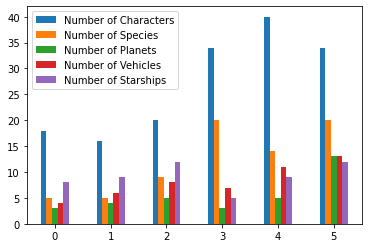

In [11]:
#tick_locations = [value for value in film_title]
labels = film_title

characters = [characters_per_film_series]
species = [species_per_film_series]
planets = [planets_per_film_series]
vehicles = [vehicles_per_film_series]
starships = [starships_per_film_series]
#index = ['A New Hope', 'The Empire Strikes Back', 'Return of the Jedi', 'The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith']
data_per_film_bar_plot = bar_plot_df.plot.bar(rot=0)
plt.xticks(labels, rotation="vertical")
plt.xlabel("Films")
plt.ylabel("Number Per Film")
plt.savefig("Figures/Bar_All_Per_Film_RK.png")


plt.show()

In [ ]:
characters = [characters_per_film_series]
species = [species_per_film_series]
planets = [planets_per_film_series]
vehicles = [vehicles_per_film_series]
starships = [starships_per_film_series]
index = ['A New Hope', 'The Empire Strikes Back', 'Return of the Jedi', 'The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith']
data_per_film_line_plot = bar_plot_df.plot.line(rot=0)
plt.title("Star Wars: How Counts Change Over Time")
plt.xlabel("Films")
plt.ylabel("Number Per Film")
plt.savefig("Figures/Line_All_Per_Film_RK.png")
plt.show()

In [ ]:

#bar chart for species per film
tick_locations = [value for value in films_df["Title"]]
labels = films_df["Title"]
plt.figure(figsize=(20, 10))
plt.bar(films_df["Title"], films_df["Species/Film"])
plt.xticks(tick_locations, labels, rotation="vertical")
plt.ylabel("Number of Species")
plt.xlabel("Films (in order of release date)")
plt.title("Number of Star Wars Species Per Film")
plt.savefig("Figures/Bar_Species_Per_Film_RK.png")
plt.show()

# Star Wars Characters

In [ ]:
# People/Characters json dump
#print(json.dumps(people_response, indent=2, sort_keys=True))

# Pull all CHARACTERS and specified data

In [ ]:
#new lists to store character info
character_list = []
character_height = []
character_mass = []
character_species = []
character_first_movie = []
character_last_movie = []
character_number_movies = []
page = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]
url_people_next = f"http://swapi.dev/api/people/?page="

for x in page:
    people_response_next = requests.get(url_people_next + x).json()
    
#for loop to list names
    for people in people_response_next["results"]:
        character_name = people["name"]
        character_list.append(character_name)
        
        height = people["height"]
        character_height.append(height)
        
        mass = people["mass"]
        character_mass.append(mass)
        
        char_species = people["species"]
        character_species.append(char_species)
        
        character_movie = people["films"][0]
        character_first_movie.append(character_movie)
        
        character_movie_last = people["films"][-1]
        character_last_movie.append(character_movie_last)
        
        character_movie_total = len(people["films"])
        character_number_movies.append(character_movie_total)
        print(f'{character_name} found!')

In [ ]:
#create new dataframe for all characters found with their data
characters_df = pd.DataFrame({"Character": character_list,
                              "Height": character_height,
                              "Mass": character_mass, 
                              "Species": character_species, 
                              "First Film": character_first_movie,
                              "Last Film": character_last_movie,
                              "Number of Film Appearances": character_number_movies})


characters_df.head(20)


In [ ]:
#drop characters that don't have a height or mass listed and create new dataframe for tracking purposes
cleaning_characters_df = characters_df.drop(characters_df[characters_df['Height'] == 'unknown'].index) 
cleaning_characters_df = characters_df.drop(characters_df[characters_df['Mass'] == 'unknown'].index) 

print(cleaning_characters_df.head(20))

#output to CSV to add missing Species [http://swapi.dev/api/species/1/: Human]
cleaning_characters_df.to_csv("csv_output/character_output.csv")


In [ ]:
#input CSV with full Species values
cleaning_characters_df = pd.read_csv("csv_output/character_output_clean.csv")
#delete unnecessary column and clean values "1,358":1358 & "Jabba Desilijic Tiure" to "Jabba The Hutt"
del cleaning_characters_df['Unnamed: 0']
cleaning_characters_df=cleaning_characters_df.reset_index(drop=True)
cleaning_characters_df.iloc[[14],[2]]=1358
cleaning_characters_df.iloc[[14],[0]]="Jabba The Hutt"
cleaning_characters_df

In [ ]:
#remove [' '] from Species Column to prepare for merge
cleaning_characters_df['Species'] = cleaning_characters_df['Species'].str.replace("[","")
cleaning_characters_df['Species'] = cleaning_characters_df['Species'].str.replace("]","")
cleaning_characters_df['Species'] = cleaning_characters_df['Species'].str.replace("'","")
cleaning_characters_df.head()

In [ ]:
#Change "Species" column name to "URL" for merge (below after Species API pull)

cleaner_characters_df = cleaning_characters_df.rename(columns={"Species": "URL"})
cleaner_characters_df.head()

In [ ]:
clean_char_height_series = pd.to_numeric(cleaner_characters_df["Height"])
clean_char_mass_series = pd.to_numeric(cleaner_characters_df["Mass"])


clean_characters_df = pd.DataFrame({"Character": cleaner_characters_df["Character"],
                                 "Height": clean_char_height_series,
                                 "Mass": clean_char_mass_series,
                                 "URL": cleaner_characters_df["URL"], 
                                 "First Film": cleaner_characters_df["First Film"],
                                 "Last Film": cleaner_characters_df["Last Film"],
                                 "Number of Film Appearances": cleaner_characters_df["Number of Film Appearances"]})
clean_characters_df

In [ ]:
# Height and Mass Dataframes by ascending order for ease of plotting

height_df = clean_characters_df.sort_values("Height", ascending=True)
print(height_df.head())

mass_df = clean_characters_df.sort_values("Mass", ascending=True)
print(mass_df.head())

# Species

In [ ]:
#SPECIES
#print(json.dumps(species_response, indent=2, sort_keys=True))

In [ ]:
#create lists to store species data
species_types = []
species_avg_height = []
species_avg_life = []
species_classification = []
species_designation = []
species_url_list = []
#page iterator & url
page = ["1", "2", "3", "4"]
find_species_url = f"http://swapi.dev/api/species/?page="

for x in page:
    find_species_response = requests.get(find_species_url + x).json()
    
#for loop to list names in films
    for species in find_species_response["results"]:
        species_name = species["name"]
        species_types.append(species_name)
        species_height = species["average_height"]
        species_avg_height.append(species_height)
        species_life = species["average_lifespan"]
        species_avg_life.append(species_life)
        species_class = species["classification"]
        species_classification.append(species_class)
        species_design = species["designation"]
        species_designation.append(species_design)
        species_url = species["url"]
        species_url_list.append(species_url)
        print(f'{species_name} found!')
        

In [ ]:
#create new dataframe for all characters found
species_df = pd.DataFrame({"Species": species_types,
                           "Average Height": species_avg_height,
                           "URL": species_url_list})
print(species_df)


In [ ]:
#drop unknown & n/a value and reset index new species list and heights
cleaning_species_df = species_df.drop(species_df[species_df['Average Height'] == 'unknown'].index) 
cleaner_species_df = cleaning_species_df.drop(cleaning_species_df[cleaning_species_df['Average Height'] == 'n/a'].index) 
cleaner_species_df = cleaner_species_df.reset_index(drop=True)
cleaner_species_df

In [ ]:
cleaner_species_series = pd.to_numeric(cleaner_species_df["Average Height"])
cleaner_species_series
clean_species_df = pd.DataFrame({"Species": cleaner_species_df["Species"],
                                 "Average Height": cleaner_species_series,
                                 "URL": cleaner_species_df["URL"]})
clean_species_df = clean_species_df.sort_values(["Average Height"], ascending=True)
clean_species_df = clean_species_df.reset_index(drop=True)
clean_species_df

# Characters, Species, & Films

In [ ]:
#inserting merged DF with species labels for characters and average heights for species
merged_characters_species_df = pd.merge(clean_characters_df, species_df, on="URL", how="left")
merged_characters_species_df = merged_characters_species_df.drop(columns=(["URL"]))
#drop unknowns and n/a
cleaning_merged_characters_species_df = merged_characters_species_df.drop(merged_characters_species_df[merged_characters_species_df['Average Height'] == 'unknown'].index) 
cleaning_merged_characters_species_df = cleaning_merged_characters_species_df.drop(cleaning_merged_characters_species_df[cleaning_merged_characters_species_df['Average Height'] == 'n/a'].index)
cleaning_merged_characters_species_df.head()

In [ ]:
#create new series with numerical data
average_height_series = pd.to_numeric(cleaning_merged_characters_species_df["Average Height"])
film_appearances_series = pd.to_numeric(cleaning_merged_characters_species_df["Number of Film Appearances"])
#create new dataframe to hold cleaner data
clean_merged_characters_species_df = pd.DataFrame({"Character": cleaning_merged_characters_species_df["Character"],
                                                   "Height": cleaning_merged_characters_species_df["Height"],
                                                   "Mass": cleaning_merged_characters_species_df["Mass"],
                                                   "Species": cleaning_merged_characters_species_df["Species"],
                                                   "Average Species Height": average_height_series,
                                                   "First Film": cleaning_merged_characters_species_df["First Film"],
                                                   "Last Film": cleaning_merged_characters_species_df["Last Film"],
                                                   "Number of Film Appearances": film_appearances_series})
#sort by Height
clean_merged_characters_species_df = clean_merged_characters_species_df.sort_values(["Height"])
clean_merged_characters_species_df = clean_merged_characters_species_df.reset_index(drop=True)
clean_merged_characters_species_df

In [ ]:
#modify film dataframe to prepare for merge
films_first_adjusted_df = films_df.rename(columns={"URL": "First Film"})
films_first_adjusted_df = films_first_adjusted_df.drop(columns=(["Episode ID"]))
films_first_adjusted_df = films_first_adjusted_df.drop(columns=(["Release Date"]))
films_first_adjusted_df

In [ ]:
#merge modified film dataframe with clean_merged_characters_species_df
merged_characters_species_film_df = pd.merge(clean_merged_characters_species_df, films_first_adjusted_df, on="First Film", how="left")
merged_characters_species_film_df = merged_characters_species_film_df.drop(columns=(["First Film"]))
#rename column 
merged_characters_species_film_df = merged_characters_species_film_df.rename(columns={"Title":"First Film Appearance"})
merged_characters_species_film_df.head()

In [ ]:
# modify film df for merge to fix "Last Film" column
films_last_adjusted_df = films_first_adjusted_df.rename(columns={"First Film":"Last Film"})
films_last_adjusted_df

In [ ]:
#merge modified "last film" df into dataframe and clean it up
clean_merged_characters_species_film_df = pd.merge(merged_characters_species_film_df, films_last_adjusted_df, on="Last Film", how="right")
clean_merged_characters_species_film_df = clean_merged_characters_species_film_df.drop(columns=("Last Film"))
clean_merged_characters_species_film_df = clean_merged_characters_species_film_df.rename(columns={"Title":"Last Film Appearance"})
clean_merged_characters_species_film_df

# experiment

In [ ]:
#experiment
#Seaborn Character Masses Plot
sns.catplot(x="Character", y="Number of Film Appearances", kind="bar", data=clean_merged_characters_species_film_df, height=6, aspect = 1.5)
plt.xticks(rotation="vertical")
plt.title("Star Wars Character Film Appearances")
plt.ylabel("Number of Film Apperances")

# PLANETS

In [ ]:
#planets
print(json.dumps(planets_response, indent=2, sort_keys=True))

In [ ]:
#create lists of planets and their attributes
planet_names = []
planet_terrains = []
planet_climates = []
planet_populations = []
planet_diameters = []
planet_films = []
planet_orbitals = []
planet_climates = []

pages = ["1", "2", "3", "4", "5", "6"]
find_planet_url = f"http://swapi.dev/api/planets/?page="

for page_number in pages:
    find_planets_response = requests.get(find_planet_url + page_number).json()
    
#for loop to list names in films
    for planets in find_planets_response["results"]:
        planet_name = planets["name"]
        planet_names.append(planet_name)
        planet_terrain = planets["terrain"]
        planet_terrains.append(planet_terrain)
        planet_climate = planets["climate"]
        planet_climates.append(planet_climate)
        planet_population = planets["population"]
        planet_populations.append(planet_population)
        planet_diameter = planets["diameter"]
        planet_diameters.append(planet_diameter)
        planet_film = planets["films"]
        planet_films.append(planet_film)
        planet_orbital = planets["orbital_period"]
        planet_orbitals.append(planet_orbital)
        planet_climate = planets["climate"]
        planet_climates.append(planet_climate)
        planet_count = len(planet_names)

        print(f'{planet_count} {planet_name} found!')


In [ ]:
#planets df
planets_df = pd.DataFrame({"Name": planet_names, 
                            "Population": planet_populations,
                            "Diameter": planet_diameters,
                            "Orbital Period": planet_orbitals
                            })
planets_df.to_csv("csv_output/planets_output.csv")
planets_df = pd.read_csv("csv_output/planets_output_formatted.csv")
planets_df.head()

In [ ]:
#Need to make and clean a new df for size vs orbital period
cleaning_planets_df = planets_df.drop(planets_df[planets_df['Orbital Period'] == 'unknown'].index)
cleaning_planets_df = cleaning_planets_df.drop(cleaning_planets_df[cleaning_planets_df["Diameter"] == 'unknown'].index)
cleaning_planets_df = cleaning_planets_df.drop(cleaning_planets_df[cleaning_planets_df["Diameter"] == '0'].index)
cleaning_planets_df = cleaning_planets_df.drop(cleaning_planets_df[cleaning_planets_df["Population"] == 'unknown'].index)
cleaning_planets_df

In [ ]:
#convert all to numeric
planet_series_population = pd.to_numeric(cleaning_planets_df["Population"])
planet_series_diameter = pd.to_numeric(cleaning_planets_df["Diameter"])
planet_series_orbital = pd.to_numeric(cleaning_planets_df["Orbital Period"])

clean_planets_df = pd.DataFrame({"Name": cleaning_planets_df["Name"],
                                             "Population": planet_series_population,
                                             "Diameter": planet_series_diameter,
                                             "Orbital Period": planet_series_orbital})

clean_planets_df

# PLOTS PLOTS PLOTS

In [ ]:
#bar chart for character heights
tick_locations = [value for value in clean_characters_df["Character"]]
labels = clean_characters_df["Character"]
plt.figure(figsize=(20, 10))
plt.bar(height_df["Character"], height_df["Height"])
plt.xticks(tick_locations, labels, rotation="vertical")
plt.ylabel("Height (cm)")
plt.xlabel("Characters")
plt.title("Star Wars Character Heights")
plt.savefig("Figures/Bar_Character_Height.png")
plt.show()

In [ ]:
#Seaborn Character Heights Plot
sns.catplot(x="Character", y="Height", kind="bar", data=height_df, height=10, aspect = 1.5,)
plt.xticks(rotation="vertical")
plt.title("Star Wars Character Heights")
plt.ylabel("Height (cm)")
plt.savefig("Figures/Seaborn_Character_Heights.png")

#Statistical Breakdown of Character Heights, Masses, and Film Apperances

In [ ]:
clean_characters_df.describe()

In [ ]:
#bar chart for character masses
tick_locations = [value for value in clean_characters_df["Character"]]
labels = clean_characters_df["Character"]
plt.figure(figsize=(20, 10))
plt.bar(mass_df["Character"], mass_df["Mass"])
plt.xticks(tick_locations, labels, rotation="vertical")
plt.title("Star Wars (Relative) Character Masses")
plt.savefig("Figures/Bar_Character_Mass.png")
plt.show()

In [ ]:
#Seaborn Character Masses Plot
sns.catplot(x="Character", y="Mass", kind="bar", data=mass_df, height=10, aspect = 1.5, palette="viridis")
plt.xticks(rotation="vertical")
plt.title("Star Wars Character Heights")
plt.ylabel("Mass (kg)")
plt.savefig("Figures/Seaborn_Character_Masses.png")

In [ ]:
plt.hist(mass_df["Mass"])
plt.title("Star Wars Character Mass Distribution")
plt.xlabel("Character Mass (kg)")
plt.ylabel("Counts")
plt.savefig("Figures/Hist_Character_Mass.png")
plt.show()
print(sts.normaltest(mass_df["Mass"].sample(50)))
print('------------------------------------------')
#stdev and var using numpy
sd_numpy = np.std(mass_df["Mass"],ddof = 0)
print(f"The sample standard deviation is {round(sd_numpy,1)}")
var_numpy = np.var(mass_df["Mass"],ddof = 0)
print(f"The sample variance using the NumPy module is {round(var_numpy,1)}")
print('------------------------------------------')
# Calculate the 68-95-99.7 rule using the standard deviation
mean_numpy = np.mean(mass_df["Mass"])
print(f"The mean mass of Star Wars characters with Jabba is {round(mean_numpy,1)}")
print('------------------------------------------')
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,1)} and {round(mean_numpy+sd_numpy,1)} kgs")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,1)} and {round(mean_numpy+2*sd_numpy,1)} kgs")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,1)} and {round(mean_numpy+3*sd_numpy,1)} kgs")

In [ ]:
no_jabba_mass_df = clean_characters_df.drop([14])
no_jabba_mass_df = no_jabba_mass_df.sort_values(["Mass"], ascending=True)
no_jabba_mass_df = no_jabba_mass_df.reset_index(drop=True)

tick_locations = [value for value in no_jabba_mass_df["Character"]]
labels = no_jabba_mass_df["Character"]
plt.figure(figsize=(20, 10))
plt.bar(no_jabba_mass_df["Character"], no_jabba_mass_df["Mass"])
plt.xticks(tick_locations, labels, rotation="vertical")
plt.title("Star Wars Character Masses (Minus Jabba)")
plt.savefig("Figures/Bar_Character_Mass_NoJabba.png")
plt.show()

In [ ]:

sns.catplot(x="Character", y="Mass", kind="bar", data=no_jabba_mass_df, height=10, aspect = 1.5, palette="viridis")
plt.xticks(rotation="vertical")
plt.grid(alpha=.25)
plt.title("Star Wars Character Heights Minus Jabba")
plt.ylabel("Mass (kg)")
plt.savefig("Figures/Seaborn_Character_Masses_NoJabba.png")

In [ ]:
plt.hist(no_jabba_mass_df["Mass"])
plt.title("Star Wars Character Mass Distribution without Jabba")
plt.xlabel("Character Mass (kg)")
plt.ylabel("Counts")
plt.savefig("Figures/Hist_Character_Mass_NoJabba.png")
plt.show()
print(sts.normaltest(no_jabba_mass_df["Mass"].sample(50)))
print('------------------------------------------')
#stdev and var using numpy
sd_numpy = np.std(no_jabba_mass_df["Mass"],ddof = 0)
print(f"The sample standard deviation is {round(sd_numpy,1)}")
var_numpy = np.var(no_jabba_mass_df["Mass"],ddof = 0)
print(f"The sample variance using the NumPy module is {round(var_numpy,1)}")
print('------------------------------------------')
# Calculate the 68-95-99.7 rule using the standard deviation
mean_numpy = np.mean(no_jabba_mass_df["Mass"])
print(f"The mean mass of Star Wars characters without Jabba is {round(mean_numpy,1)}")
print('------------------------------------------')
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,1)} and {round(mean_numpy+sd_numpy,1)} kgs")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,1)} and {round(mean_numpy+2*sd_numpy,1)} kgs")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,1)} and {round(mean_numpy+3*sd_numpy,1)} kgs")

In [ ]:
print(f'Statistical Analysis of Mass with Jabba:')
print(mass_df["Mass"].describe())
print(f'Statistical Analysis of Mass without Jabba:')
print(no_jabba_mass_df["Mass"].describe())


In [ ]:
#scatter plot height vs mass, Need regression
x_values = clean_characters_df["Height"]
y_values = clean_characters_df["Mass"].astype(float)
plt.figure(figsize=(20,10))
plt.scatter(x_values, y_values, edgecolors="black")
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(130,100),fontsize=12,color="red")
#aesthetics
plt.grid()
plt.title("Character Height vs Mass")
plt.xlabel("Character Height (cm)")
plt.ylabel("Character Mass (kg)")
plt.savefig("Figures/Scatter_Character_HeightVsMass.png")
plt.show()
print(f"The r-squared is: {r_squared}")

In [ ]:
sns.regplot(x="Height", y="Mass", data=clean_characters_df);
plt.title("Star Wars Characters: Height Vs Mass with Jabba")
plt.savefig("Figures/Seaborn_Character_HeightsVsMass.png")

In [ ]:
#scatter plot height vs mass, Need regression
x_values = no_jabba_mass_df["Height"]
y_values = no_jabba_mass_df["Mass"]
plt.figure(figsize=(20,10))
plt.scatter(x_values, y_values, edgecolors="black")
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(130,60),fontsize=12,color="red")
#aesthetics
plt.grid()
plt.title("Character Height vs Mass with No Jabba")
plt.xlabel("Character Height (cm)")
plt.ylabel("Character Mass (kg)")
plt.savefig("Figures/Scatter_Character_HeightVsMass_NoJabba.png")
plt.show()
print(f"The r-squared is: {r_squared}")

In [ ]:
sns.regplot(x="Height", y="Mass", data=no_jabba_mass_df);
plt.title("Star Wars Characters Mass Vs Height No Jabba")
plt.xlabel("Height (cm)")
plt.savefig("Figures/Seaborn_Character_Masses_NoJabba.png")

In [ ]:
#SPECIES Average Height Bar Plot
tick_locations = [value for value in clean_species_df["Species"]]
labels = clean_species_df["Species"]
plt.figure(figsize=(20, 10))
plt.bar(clean_species_df["Species"], clean_species_df["Average Height"].astype(float))
plt.xticks(tick_locations, labels, rotation="vertical")
plt.title("Star Wars Species Average Heights")
plt.xlabel("Species")
plt.ylabel("Average Species Height (cm)")
plt.savefig("Figures/Bar_Species_AvgHeights.png")
plt.show()

# experiment

In [ ]:

sns.set_style("whitegrid")
#tick_locations = [value for value in clean_merged_characters_species_df["Character"]]
sns.catplot(x="Height", y="Mass", hue="Character", kind="point", data=clean_merged_characters_species_df, height = 5, aspect = 1.5)
plt.xticks(rotation="vertical")
plt.title("Star Wars Height vs Mass: with Average Species Height per Markers")
plt.savefig("Figures/Seaborn_Height_Mass_AverageAll.png")
plt.show()

In [ ]:
#make new DF without Jabba
no_jabba_merge_df = clean_merged_characters_species_df.drop([17])
no_jabba_merge_df = no_jabba_merge_df.reset_index(drop=True)
no_jabba_merge_df.head(18)

In [ ]:
#new plot without jabba
sns.set_style("whitegrid")

sns.catplot(x="Height", y="Mass", hue="Average Species Height", kind="point", data=no_jabba_merge_df, height = 5, aspect = 1.5)

plt.title("Height vs Mass: with Weighted Average Height per Species Markers")
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
#experiment with
sns.set_style("whitegrid")
#tick_locations = [value for value in clean_merged_characters_species_df["Character"]]
sns.catplot(x="Character", y="Mass", hue="Height", kind="point", data=no_jabba_merge_df, height = 5, aspect = 1.5)
plt.xticks(rotation="vertical")
plt.title("Star Wars Height vs Mass: No Jabba")
plt.savefig("Figures/Seaborn_Scatter_Height_Mass_NoJabba.png")
plt.show()

In [ ]:
#create chart-specific df with sorted values for planet diameter
clean_planets_diameter_df = clean_planets_df.sort_values(["Diameter"], ascending=True)
#bar chart planet size by diameter
x_axis = clean_planets_diameter_df["Name"]
y_axis = clean_planets_diameter_df["Diameter"]
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20, 10))
plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.title("Star Wars Planets by Size")
plt.xlabel("Star Wars Planets")
plt.ylabel("Size (diameter in km)")
plt.savefig("Figures/Bar_Planet_Size.png")
plt.show()

In [ ]:
#scatter plot PLANET SIZE vs ORBITAL PERIOD.  Need regression
x_values = clean_planets_df["Diameter"]
y_values = clean_planets_df["Orbital Period"]
plt.figure(figsize=(20,10))
plt.scatter(x_values, y_values)
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20000,1000),fontsize=12,color="red")
#aesthetics
plt.title("Star Wars Planet Sizes vs Orbital Periods")
plt.xlabel("Planet Size (Diameter in km)")
plt.ylabel("Planet Orbital Period")
plt.grid()
plt.savefig("Figures/Scatter_Planet_SizeVsOrbital.png")
plt.show()

In [ ]:
clean_population_df = clean_planets_df.sort_values(["Population"], ascending=False)
clean_population_df = clean_population_df.reset_index(drop=True)
#scatter plot planet size vs population. Need regression

x_values = clean_population_df["Diameter"]
y_values = clean_population_df["Population"]
plt.figure(figsize=(20,10))
plt.scatter(x_values, y_values)
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10000,.05e12),fontsize=12,color="red")
#aesthetics
plt.title("Star Wars Planet Size vs Population (1e12 = 1 trillion)")
plt.xlabel("Planet Size (Diameter in km)")
plt.ylabel("Planet Population (count)")
plt.savefig("Figures/Scatter_Planet_SizevsPopulation.png")
plt.show()

In [ ]:
sns.regplot(x="Diameter", y="Population", data=clean_population_df);
plt.title("Star Wars Planet Size vs Population (1e12 = 1 trillion)")

In [ ]:
#statistics for Planet Population Distribution
plt.hist(clean_population_df["Population"])
plt.title("Star Wars Planet Population Distribution")
plt.xlabel("Population [in Trillions]")
plt.ylabel("Counts")
print(sts.normaltest(clean_planets_df["Population"].sample(35)))
sd_numpy = np.std(clean_planets_df["Population"],ddof = 0)
print(f"The population standard deviation is {sd_numpy}")
var_numpy = np.var(clean_planets_df["Population"],ddof = 0)
print(f"The population variance is {var_numpy}")
plt.savefig("Figures/Hist_Planet_Population.png")
plt.show()

In [ ]:
#drop coruscant as an outlier (1 trillion people)
no_coruscant_planets_df = clean_population_df.drop([0])
no_coruscant_planets_df.head()

In [ ]:
#scatter for no coruscant planets
x_values = no_coruscant_planets_df["Diameter"]
y_values = no_coruscant_planets_df["Population"]
plt.figure(figsize=(20,10))
plt.scatter(x_values, y_values)
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20000,.09e11),fontsize=12,color="red")
#aesthetics
plt.title("Star Wars Planet Size vs Population No Coruscant(1e11 = 100 billion)")
plt.xlabel("Planet Size (Diameter in km)")
plt.ylabel("Planet Population (count)")
plt.savefig("Figures/Scatter_Planet_SizevsPopulation.png")
plt.show()
print(f"The r-squared is: {r_squared}")

In [ ]:
sns.regplot(x="Diameter", y="Population", data=no_coruscant_planets_df);
plt.title("Star Wars Planet Size vs Population No Coruscant (1e11 = 100 billion)")

In [ ]:
#statistics for Planet Population Distribution
plt.hist(no_coruscant_planets_df["Population"])
plt.title("Star Wars Planet Population Distribution without Coruscant")
plt.xlabel("Population [in Hundreds of Billions]")
plt.ylabel("Counts")
print(sts.normaltest(clean_planets_df["Population"].sample(35)))
sd_numpy = np.std(clean_planets_df["Population"],ddof = 0)
print(f"The population standard deviation is {sd_numpy}")
var_numpy = np.var(clean_planets_df["Population"],ddof = 0)
print(f"The population variance is {var_numpy}")
plt.savefig("Figures/Hist_Planet_Population_no_Coruscant.png")
plt.show()


In [ ]:
#remove geonosis (100 billion people)
no_geonosis_coruscant_planets_df = no_coruscant_planets_df.drop([1])
no_geonosis_coruscant_planets_df = no_geonosis_coruscant_planets_df.reset_index(drop=True)
no_geonosis_coruscant_planets_df

In [ ]:
#scatter for no coruscant planets
x_values = no_geonosis_coruscant_planets_df["Diameter"]
y_values = no_geonosis_coruscant_planets_df["Population"]
plt.figure(figsize=(20,10))
plt.scatter(x_values, y_values)
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40000,.4e10),fontsize=12,color="red")
#aesthetics
plt.title("Star Wars Planet Size vs Population No Coruscant or Geonosis (1e10 = 10 billion)")
plt.xlabel("Planet Size (Diameter in km)")
plt.ylabel("Planet Population (count)")
plt.savefig("Figures/Scatter_Planet_SizevsPopulation_no_CoruscantGeonosis.png")
plt.show()
print(f"The r-squared is: {r_squared}")

In [ ]:
sns.regplot(x="Diameter", y="Population", data=no_geonosis_coruscant_planets_df);
plt.title("Star Wars Planet Size vs Population No Coruscant or Geonosis (1e10 = 10 billion)")

In [ ]:
#statistics for Planet Population Distribution
plt.hist(no_geonosis_coruscant_planets_df["Population"])
plt.title("Star Wars Planet Population Distribution without Coruscant&Geonosis")
plt.xlabel("Population [in Tens of Billions]")
plt.ylabel("Counts")
print(sts.normaltest(clean_planets_df["Population"].sample(35)))
sd_numpy = np.std(clean_planets_df["Population"],ddof = 0)
print(f"The population standard deviation is {sd_numpy}")
var_numpy = np.var(clean_planets_df["Population"],ddof = 0)
print(f"The population variance is {var_numpy}")
plt.savefig("Figures/Hist_Planet_Population_no_CoruscantGeonosis.png")
plt.show()